In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip

unzip:  cannot find or open /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip, /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.zip or /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.ZIP.


In [ ]:
kabaddi_data= pd.read_csv('/content/drive/MyDrive/Prokabaddi_Dataset/prokabaddi.csv')

In [ ]:
kabaddi_data.head()

,match_no,stage,team1,team2,team1_score,team2_score,date,location,season
0,1,League,U Mumba,Jaipur Pink Panthers,45,31,26-07-2014,"Dome@NSCI Svp Stadium, Mumbai, Mumbai",1
1,2,League,Dabang Delhi KC,Bengaluru Bulls,28,47,27-07-2014,"Dome@NSCI Svp Stadium, Mumbai, Mumbai",1
2,3,League,Bengaluru Bulls,Puneri Paltan,40,37,28-07-2014,"Dome@NSCI Svp Stadium, Mumbai, Mumbai",1
3,4,League,U Mumba,Bengal Warriors,36,25,29-07-2014,"Dome@NSCI Svp Stadium, Mumbai, Mumbai",1
4,5,League,Puneri Paltan,Dabang Delhi KC,31,35,30-07-2014,"Dome@NSCI Svp Stadium, Mumbai, Mumbai",1


In [ ]:
kabaddi_data.shape

(790, 9)

In [ ]:
kabaddi_data.columns

Index(['match_no', 'stage', 'team1', 'team2', 'team1_score', 'team2_score',
       'date', 'location', 'season'],
      dtype='object')

In [ ]:
kabaddi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match_no     790 non-null    int64 
 1   stage        790 non-null    object
 2   team1        790 non-null    object
 3   team2        790 non-null    object
 4   team1_score  790 non-null    int64 
 5   team2_score  790 non-null    int64 
 6   date         790 non-null    object
 7   location     790 non-null    object
 8   season       790 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 55.7+ KB


In [ ]:
kabaddi_data.describe()

,match_no,team1_score,team2_score,season
count,790.000000,790.000000,790.000000,790.000000
mean,37.984810,32.525316,32.713924,5.282278
std,26.209157,7.153309,7.810602,2.152622
min,0.000000,15.000000,15.000000,1.000000
25%,17.000000,27.250000,27.000000,4.000000
50%,33.000000,32.000000,32.000000,6.000000
75%,55.000000,37.000000,37.000000,7.000000
max,99.000000,69.000000,69.000000,8.000000


In [ ]:
kabaddi_data.isnull().sum()

match_no       0
stage          0
team1          0
team2          0
team1_score    0
team2_score    0
date           0
location       0
season         0
dtype: int64

In [ ]:
kabaddi_data.nunique()


match_no       100
stage           17
team1           13
team2           13
team1_score     41
team2_score     46
date           467
location        30
season           8
dtype: int64

In [ ]:
kabaddi_data['team1'].unique()

array(['U Mumba', 'Dabang Delhi KC', 'Bengaluru Bulls', 'Puneri Paltan',
       'Bengal Warriors', 'Jaipur Pink Panthers', 'Telugu Titans',
       'Patna Pirates', 'Gujarat Fortunegiants', 'Haryana Steelers',
       'UP Yoddha', 'Tamil Thalaivas', 'Gujarat Giants'], dtype=object)

In [ ]:
U_Mumba_Matches_Team1 = kabaddi_data[kabaddi_data['team1'] == 'U Mumba']

In [ ]:

U_Mumba_Matches_Team1.head()


,match_no,stage,team1,team2,team1_score,team2_score,date,location,season
0,1,League,U Mumba,Jaipur Pink Panthers,45,31,26-07-2014,"Dome@NSCI Svp Stadium, Mumbai, Mumbai",1
3,4,League,U Mumba,Bengal Warriors,36,25,29-07-2014,"Dome@NSCI Svp Stadium, Mumbai, Mumbai",1
5,6,League,U Mumba,Telugu Titans,35,35,31-07-2014,"Dome@NSCI Svp Stadium, Mumbai, Mumbai",1
6,7,League,U Mumba,Patna Pirates,36,33,01-08-2014,"Dome@NSCI Svp Stadium, Mumbai, Mumbai",1
16,17,League,U Mumba,Puneri Paltan,44,28,11-08-2014,"Thyagaraj Sports Complex, Delhi, Delhi",1


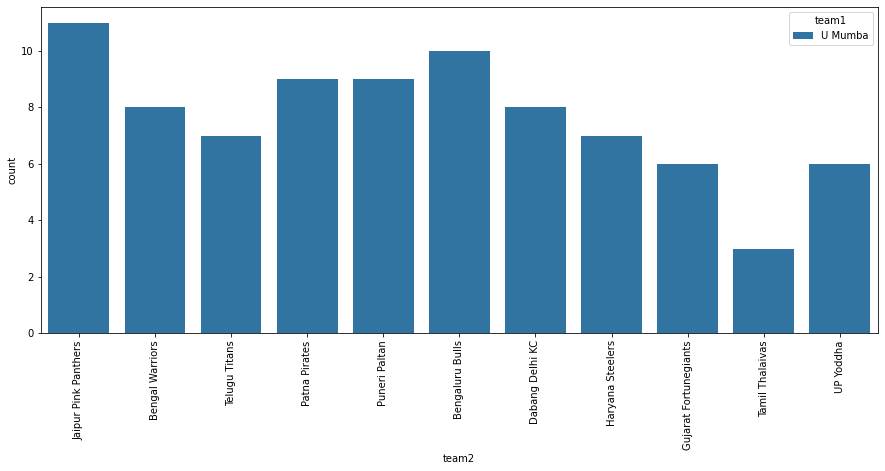

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('team2',hue='team1', data = U_Mumba_Matches_Team1)
plt.xticks(rotation = 90)
plt.show()


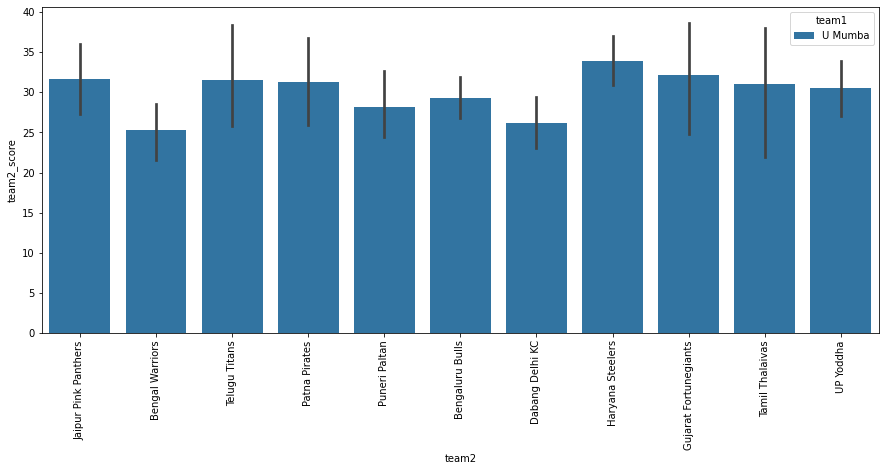

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'team2', y ='team2_score',hue='team1', data = U_Mumba_Matches_Team1)
plt.xticks(rotation = 90)
plt.show()

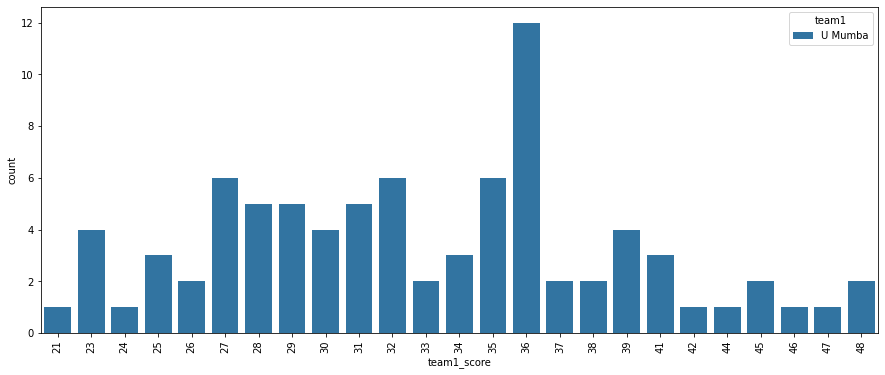

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('team1_score',hue='team1', data = U_Mumba_Matches_Team1)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
conditions = [U_Mumba_Matches_Team1['team1_score'] > U_Mumba_Matches_Team1['team2_score'],
              U_Mumba_Matches_Team1['team1_score'] < U_Mumba_Matches_Team1['team2_score']]

In [ ]:
choices = ['Winner', 'Loose']


In [ ]:
U_Mumba_Matches_Team1['result'] = np.select(conditions, choices, default='Tie')

In [ ]:
U_Mumba_Matches_Team1.head()

,match_no,stage,team1,team2,team1_score,team2_score,date,location,season,result
0,1,League,U Mumba,Jaipur Pink Panthers,45,31,26-07-2014,"Dome@NSCI Svp Stadium, Mumbai, Mumbai",1,Winner
3,4,League,U Mumba,Bengal Warriors,36,25,29-07-2014,"Dome@NSCI Svp Stadium, Mumbai, Mumbai",1,Winner
5,6,League,U Mumba,Telugu Titans,35,35,31-07-2014,"Dome@NSCI Svp Stadium, Mumbai, Mumbai",1,Tie
6,7,League,U Mumba,Patna Pirates,36,33,01-08-2014,"Dome@NSCI Svp Stadium, Mumbai, Mumbai",1,Winner
16,17,League,U Mumba,Puneri Paltan,44,28,11-08-2014,"Thyagaraj Sports Complex, Delhi, Delhi",1,Winner


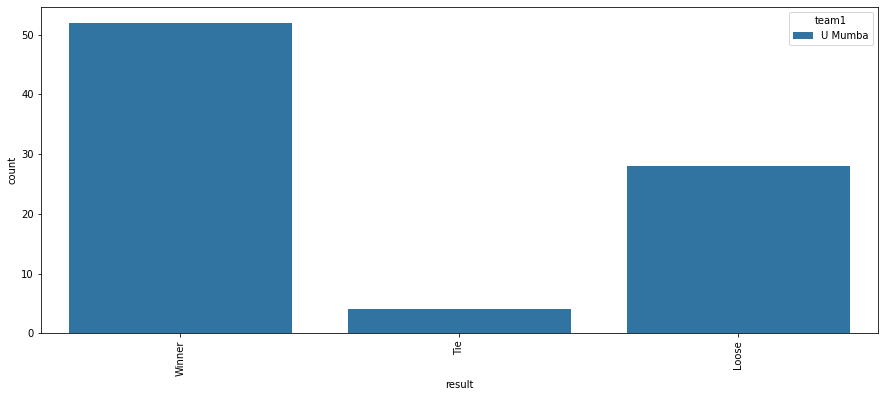

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'result',hue='team1', data = U_Mumba_Matches_Team1)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
U_Mumba_Matches_Team1['result']= label_encoder.fit_transform(U_Mumba_Matches_Team1['result'])

In [ ]:
U_Mumba_Matches_Team1['team1']= label_encoder.fit_transform(U_Mumba_Matches_Team1['team2'])

In [ ]:
U_Mumba_Matches_Team1['team2']= label_encoder.fit_transform(U_Mumba_Matches_Team1['team2'])

In [ ]:
x= U_Mumba_Matches_Team1.drop(['match_no', 'stage', 'team1_score', 'team2_score',
'date', 'location', 'season', 'result'], axis =1)

In [ ]:
y = U_Mumba_Matches_Team1.result

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.5373134328358209
Testing Accuracy : 0.9411764705882353
